In [1]:
from lsst.daf.butler import Butler

In [2]:
butler = Butler('dp02', collections=["u/ameisner/custom_coadd_window1_test1"])

my_dataId = {'band': 'i', 'tract': 4431, 'patch': 17}
my_deepCoadd = butler.get('deepCoadd', my_dataId)
my_deepCoadd_photoCalib = my_deepCoadd.getPhotoCalib()

In [3]:
del butler

In [4]:
butler = Butler('dp02', collections=["u/ameisner/custom_coadd_window1_test1_det"])

In [5]:
my_sources = butler.get('deepCoadd_meas', dataId=my_dataId)

In [6]:
# this is will be in the ~5-6k sources range (higher than expected) because it's necessary to trim to 
# detect_isPrimary=True

len(my_sources)

5603

In [7]:
my_sources = my_sources[my_sources['detect_isPrimary'] == True]

In [8]:
# now this very closely matches the original version of notebook 9b to within a few sources

len(my_sources)

2673

In [9]:
my_sources["base_PsfFlux_instFlux"]

array([ 28.58142319,  23.09514315,  22.42529654, ...,  19.51812599,
       218.58003285,  36.09596809])

In [10]:
# mostly copied from original version of notebook 9b

import numpy as np

i_CalibMag_AB = np.zeros(len(my_sources), dtype='float')
for s in range(len(my_sources)):
    i_CalibMag_AB[s] = \
    my_deepCoadd_photoCalib.instFluxToMagnitude(my_sources['base_PsfFlux_instFlux'][s])

In [11]:
i_CalibMag_AB


array([23.35979037, 23.59119835, 23.62315451, ..., 23.77390471,
       21.15097378, 23.10635326])

In [12]:
len(i_CalibMag_AB)

2673

(array([  9.,   9.,  13.,  32., 111.,  85., 101., 144., 291., 551., 917.,
        394.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([15.58436506, 16.31208338, 17.03980171, 17.76752004, 18.49523837,
        19.22295669, 19.95067502, 20.67839335, 21.40611167, 22.13383   ,
        22.86154833, 23.58926665, 24.31698498, 25.04470331, 25.77242164,
        26.50013996, 27.22785829, 27.95557662, 28.68329494, 29.41101327,
        30.1387316 ]),
 [<matplotlib.patches.Polygon at 0x7f7a301d4c70>])

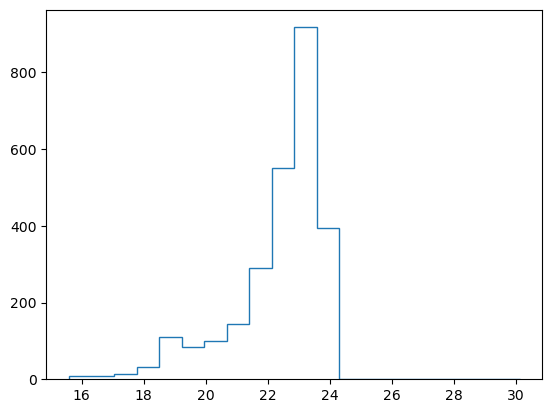

In [15]:
import matplotlib.pyplot as plt
plt.hist(i_CalibMag_AB, bins=20, histtype='step', label='custom coadd')